Mean Absolute Error: 0.077021267653333
Mean Squared Error: 0.022729998430422782


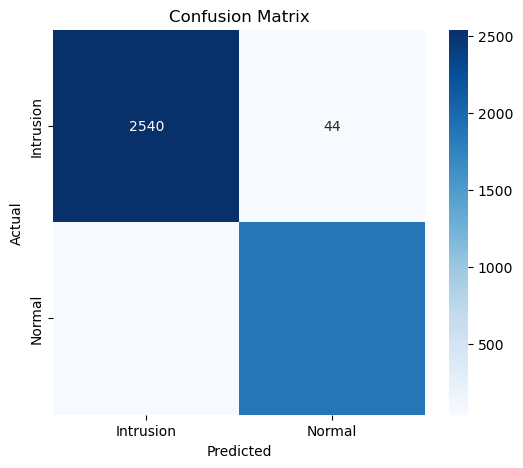

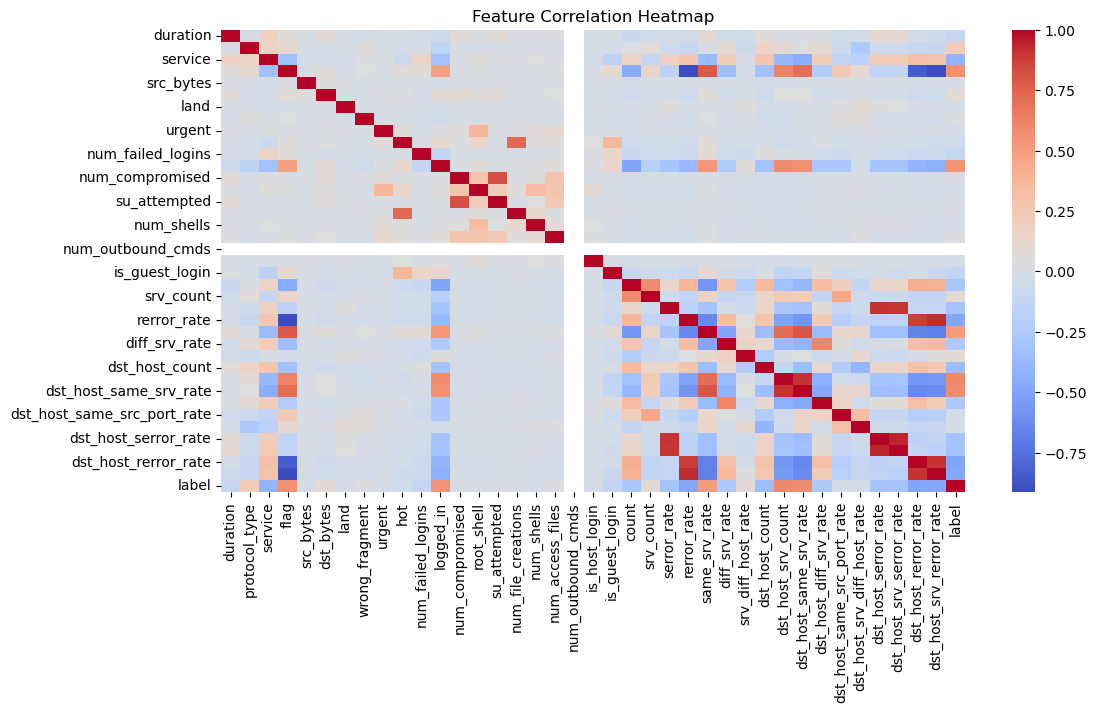

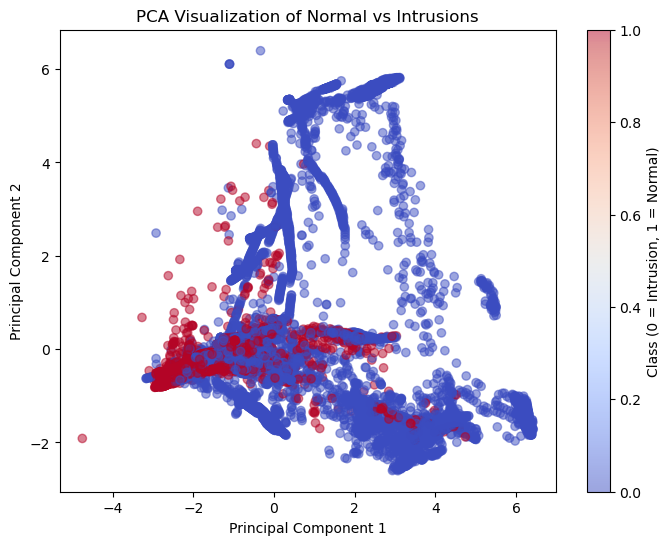

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA

dataset_path = r"C:\Users\Shreshth Arora\Desktop\nslkdd.csv"
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", 
           "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", 
           "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
           "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

data = pd.read_csv(r"C:\Users\Shreshth Arora\Desktop\nslkdd.csv", names=columns, header=None)

# Encode categorical features
label_encoders = {}
categorical_cols = ["protocol_type", "service", "flag"]
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode labels
data['label'] = data['label'].apply(lambda x: 1 if x == 'normal' else 0)

# Feature selection: Remove highly correlated features
corr_matrix = data.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data.drop(columns=to_drop, inplace=True)

# Split features and labels
X = data.drop(columns=['label'])
y = data['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVR model with optimized hyperparameters
svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svr.fit(X_train, y_train)

# Predictions
y_pred = svr.predict(X_test)

# Convert regression output to classification (Threshold: 0.5)
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# --- Visualization 1: Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Intrusion", "Normal"], yticklabels=["Intrusion", "Normal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Visualization 2: Feature Correlation Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Visualization 3: PCA Plot ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Normal vs Intrusions")
plt.colorbar(label="Class (0 = Intrusion, 1 = Normal)")
plt.show()
